# Import modules

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

In [3]:
# import own function
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [4]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

In [5]:
import os
os.getcwd()

'/nfs/team205/kk18/notebooks/Foetal/Trisomy21/RNA'

# Read in anndata

• Calculating fraction using NOT subsampled adata

In [6]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel.h5ad')
adata

AnnData object with n_obs × n_vars = 147494 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score', 'euploid_or_t21', 'donor_type', 'region_finest', 'flushed', 'scrublet_leiden', 'cluster_scrublet_score', 'leiden_scVI_0.1', 'leide

# Calculate and compare fraction

- Fraction of compact and trabeculated CM in either left or right vCMs

In [7]:
from scipy.stats import ranksums

## Left vCMs

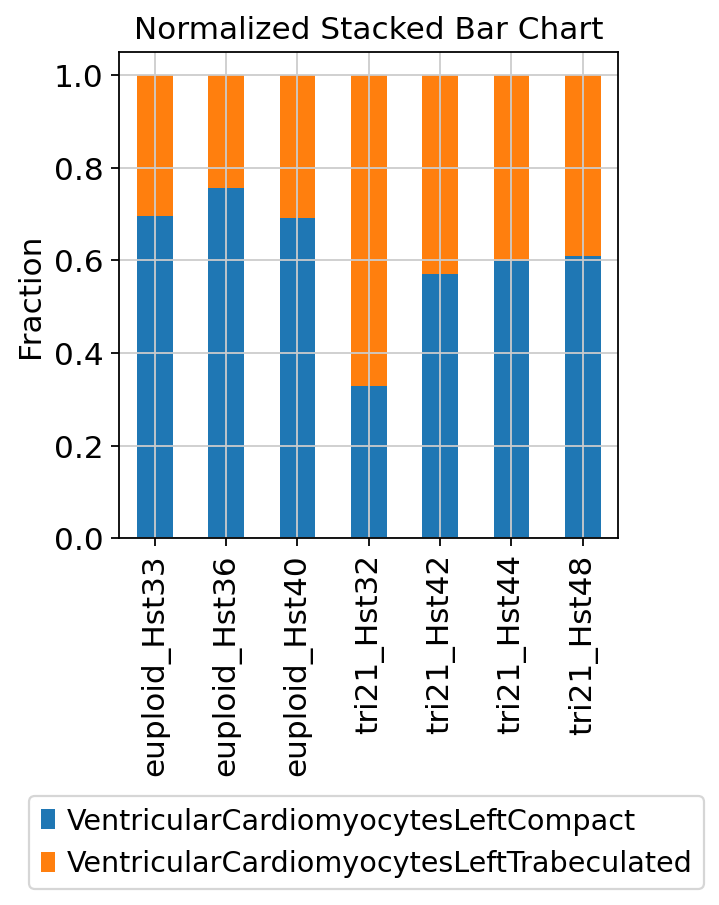

In [9]:
cells_to_include = ['VentricularCardiomyocytesLeftCompact','VentricularCardiomyocytesLeftTrabeculated']
group_col = 'fine_grain_merged'

ad = adata[adata.obs[group_col].isin(cells_to_include)]
ad.obs['condition_donor'] = ad.obs['euploid_or_t21'].astype('str')+'_'+ad.obs['donor'].astype('str')

# sangerID proportion
crosstab=pd.crosstab(ad.obs['condition_donor'],ad.obs[group_col])
# Normalize each row to sum to 1 (i.e., to get fractions)
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plotting the stacked bar chart
ax = crosstab_normalized.plot(kind='bar',stacked=True,figsize=(4, 4),legend=False)

# Adding labels and title
plt.rcParams['axes.grid'] = False
plt.ylabel('Fraction')
plt.title('Normalized Stacked Bar Chart')
plt.legend(bbox_to_anchor=(0.7, -1, 0.5, 0.5))
plt.xlabel(None)
# Show the plot
plt.show()

/tmp/ipykernel_3787554/1312438397.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=split_col, y='value', col='fine_grain_merged', data=data, kind='box', palette=palette,


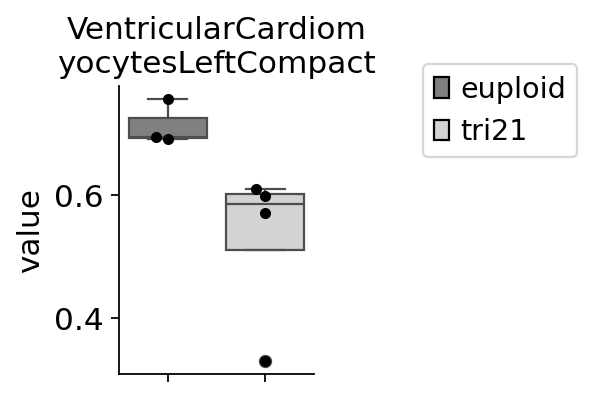

RanksumsResult(statistic=2.1213203435596424, pvalue=0.03389485352468927)

In [12]:
cells_to_include = ['VentricularCardiomyocytesLeftCompact','VentricularCardiomyocytesLeftTrabeculated']
group_col = 'fine_grain_merged'
split_col = 'euploid_or_t21'
celltype = 'VentricularCardiomyocytesLeftCompact'
ncols = 6


ad = adata[adata.obs[group_col].isin(cells_to_include)]
ad.obs['condition_donor'] = ad.obs['euploid_or_t21'].astype('str')+'_'+ad.obs['donor'].astype('str')

# sangerID proportion
crosstab=pd.crosstab(ad.obs['condition_donor'],ad.obs[group_col])
# Normalize each row to sum to 1 (i.e., to get fractions)
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# prepare data for plotting
data = crosstab_normalized.reset_index().melt(id_vars=['condition_donor'])
data['euploid_or_t21'] = [x.split('_')[0] for x in data['condition_donor']]
data = data[data[group_col]==celltype]
palette = ['gray','lightgray']

# Create a catplot with boxplots for each gene
g = sns.catplot(x=split_col, y='value', col='fine_grain_merged', data=data, kind='box', palette=palette,
                col_wrap=ncols, sharey=False, sharex=False, height=3, aspect=0.6)

# Overlay swarmplot on each Axes
# We'll use the 'hue' parameter to match the subsets and turn off dodge to align the points with the boxes.
for celltype, ax in zip(data['fine_grain_merged'].unique(), g.axes.flat):
    subset = data[data['fine_grain_merged'] == celltype]
    sns.swarmplot(x=split_col, y='value', data=subset, color='k', size=5, ax=ax, dodge=False)

# Update titles to remove "gene ="
for ax, celltype in zip(g.axes.flat, data['fine_grain_merged'].unique()):
    middle_ind = round(len(celltype)/2)
    celltype_title = f'{celltype[:middle_ind]}\n{celltype[middle_ind:]}'
    ax.set_title(celltype_title)

# Rotate x-tick labels and remove x-axis labels
for i,ax in enumerate(g.axes.flat):
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    ax.set_xticklabels('')
    ax.set_xlabel('')  # Remove x-axis labels
    if i!=0:
        ax.set_ylabel('')

# Adjust the spacing of the plots
g.fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Manually create a legend for the groups.
# Since there are no legend handles for the swarmplot, we create them manually.
from matplotlib.patches import Patch
legend_patches = [Patch(facecolor=palette[0], edgecolor='k', label='euploid'),
                  Patch(facecolor=palette[1], edgecolor='k', label='tri21'),
                  ]

# Add a single legend for the entire figure with our custom patches
g.fig.legend(handles=legend_patches, labels=['euploid', 'tri21'], title='', loc='center', bbox_to_anchor=(0.3, 0.8))

# Show the plot
plt.savefig(f'{figdir}/Tri21_BoxPlot_vCMLeft-fraction-compact-trab.pdf',bbox_inches="tight",dpi=300)
plt.show()

# statistical test
ranksums(data[data['euploid_or_t21']=='euploid']['value'],
         data[data['euploid_or_t21']=='tri21']['value']
        )

## Right vCMs

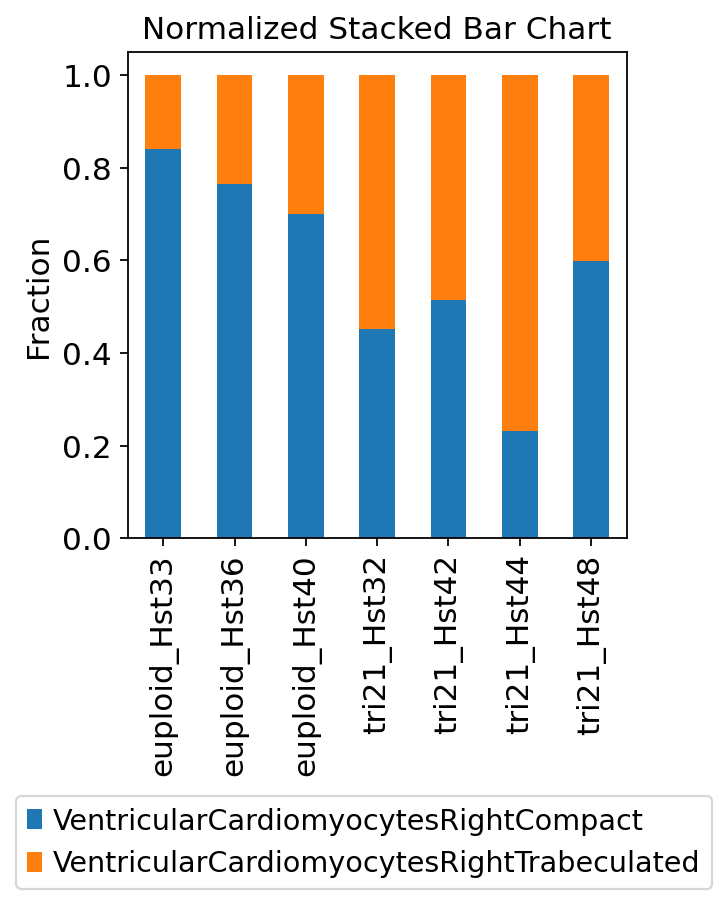

In [10]:
cells_to_include = ['VentricularCardiomyocytesRightCompact','VentricularCardiomyocytesRightTrabeculated']
group_col = 'fine_grain_merged'

ad = adata[adata.obs[group_col].isin(cells_to_include)]
ad.obs['condition_donor'] = ad.obs['euploid_or_t21'].astype('str')+'_'+ad.obs['donor'].astype('str')

# sangerID proportion
crosstab=pd.crosstab(ad.obs['condition_donor'],ad.obs[group_col])
# Normalize each row to sum to 1 (i.e., to get fractions)
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plotting the stacked bar chart
ax = crosstab_normalized.plot(kind='bar',stacked=True,figsize=(4, 4),legend=False)

# Adding labels and title
plt.rcParams['axes.grid'] = False
plt.ylabel('Fraction')
plt.title('Normalized Stacked Bar Chart')
plt.legend(bbox_to_anchor=(0.7, -1, 0.5, 0.5))
plt.xlabel(None)
# Show the plot
plt.show()

/tmp/ipykernel_3787554/2915419533.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=split_col, y='value', col='fine_grain_merged', data=data, kind='box', palette=palette,


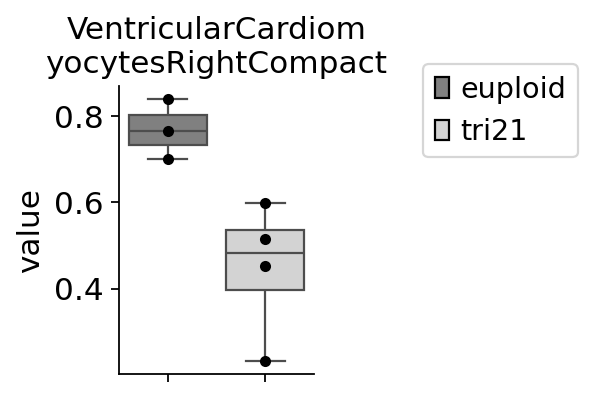

RanksumsResult(statistic=2.1213203435596424, pvalue=0.03389485352468927)

In [13]:
cells_to_include = ['VentricularCardiomyocytesRightCompact','VentricularCardiomyocytesRightTrabeculated']
group_col = 'fine_grain_merged'
split_col = 'euploid_or_t21'
celltype = 'VentricularCardiomyocytesRightCompact'


ad = adata[adata.obs[group_col].isin(cells_to_include)]
ad.obs['condition_donor'] = ad.obs['euploid_or_t21'].astype('str')+'_'+ad.obs['donor'].astype('str')

# sangerID proportion
crosstab=pd.crosstab(ad.obs['condition_donor'],ad.obs[group_col])
# Normalize each row to sum to 1 (i.e., to get fractions)
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

# prepare data for plotting
data = crosstab_normalized.reset_index().melt(id_vars=['condition_donor'])
data['euploid_or_t21'] = [x.split('_')[0] for x in data['condition_donor']]
data = data[data[group_col]==celltype]
palette = ['gray','lightgray']

# Create a catplot with boxplots for each gene
g = sns.catplot(x=split_col, y='value', col='fine_grain_merged', data=data, kind='box', palette=palette,
                col_wrap=ncols, sharey=False, sharex=False, height=3, aspect=0.6)

# Overlay swarmplot on each Axes
# We'll use the 'hue' parameter to match the subsets and turn off dodge to align the points with the boxes.
for celltype, ax in zip(data['fine_grain_merged'].unique(), g.axes.flat):
    subset = data[data['fine_grain_merged'] == celltype]
    sns.swarmplot(x=split_col, y='value', data=subset, color='k', size=5, ax=ax, dodge=False)

# Update titles to remove "gene ="
for ax, celltype in zip(g.axes.flat, data['fine_grain_merged'].unique()):
    middle_ind = round(len(celltype)/2)
    celltype_title = f'{celltype[:middle_ind]}\n{celltype[middle_ind:]}'
    ax.set_title(celltype_title)

# Rotate x-tick labels and remove x-axis labels
for i,ax in enumerate(g.axes.flat):
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    ax.set_xticklabels('')
    ax.set_xlabel('')  # Remove x-axis labels
    if i!=0:
        ax.set_ylabel('')

# Adjust the spacing of the plots
g.fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Manually create a legend for the groups.
# Since there are no legend handles for the swarmplot, we create them manually.
from matplotlib.patches import Patch
legend_patches = [Patch(facecolor=palette[0], edgecolor='k', label='euploid'),
                  Patch(facecolor=palette[1], edgecolor='k', label='tri21'),
                  ]

# Add a single legend for the entire figure with our custom patches
g.fig.legend(handles=legend_patches, labels=['euploid', 'tri21'], title='', loc='center', bbox_to_anchor=(0.3, 0.8))

# Show the plot
plt.savefig(f'{figdir}/Tri21_BoxPlot_vCMRight-fraction-compact-trab.pdf',bbox_inches="tight",dpi=300)
plt.show()

# statistical test
ranksums(data[data['euploid_or_t21']=='euploid']['value'],
         data[data['euploid_or_t21']=='tri21']['value']
        )